<a href="https://colab.research.google.com/github/Santiago-Castellanos/Estudiantes-EAFIT/blob/Renta-Variable---EAFIT/Betas_I_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de un portafolio con varios activos



## Instalar paquetes

In [3]:
#Instalar paquetes necesarios
!pip install yfinance &> /dev/null
!pip install fix_yahoo_finance &> /dev/null

import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings('ignore')

## Crear función descargar datos

Crear función para descargar información de varios activos al mismo tiempo.
Los datos quedan guardados en un activo tipo pandas.core

In [4]:
def getMultiAssetData(ticketList, start_date, end_date,interval='1mo'):
    def getData(ticker):
        data = yf.download(ticker, start_date, end_date,interval=interval)
        return data
    datas = map(getData, ticketList) #Aplicar la función GetData al array "TicketList"
    return pd.concat(datas, keys=ticketList, names=['Ticker', 'Date'])

## Descargar datos

Indicar los tickers (deben coincidir con el ticker de Investing) y las fechas para descargar los datos

In [5]:
Lista = ['AAPL', 'AMZN','BAC', 'JNJ', 'KO', 'XOM', 'PG','WMT','PFE','MSFT','GOOG','SPY']  #Activos U.S.
#Lista=['AXXJ','ACWI','ARCC','ARCO','BRK.B','CSTNL','DXJ','GSBD','IAU','ILF','MRCC','NU','PCLOF','QQQ','SMH','TCPC','USMV','VTV','WFC','XLP','SUWS']
#Lista = ['QQQ','SPY','DJI','AGG','ACWI','GXG','COP=X']  # Indices U.S.
#Lista = ['ECOPETROL.CL', 'PFBCOLOM.CL' ,'ISA.CL' ,'PFGRUPSURA.CL','PFAVAL.CL'] #Activos Col
#Lista = ['^SPCOSLCP','COP=X', 'SPY' ,'AGG' ,'ILF','DBC','IJH','VO','SCHM','IWM','VBR','SCHA','VTV','IVW','VGK','AIA','EWJ','VWO','EWZ','EWW','ECH','GLD','USO','COPA.L','USMV','MTUM','SIZE','XLK','XLE','XLF'] #Activos Col

inicio = '2017-10-14'
final = '2023-10-14'

In [6]:
data=getMultiAssetData(ticketList=Lista, start_date=inicio, end_date=final, interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df = data.copy()
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,864.000000,864.000000,864.000000,864.000000,864.000000,8.640000e+02
mean,122.262180,128.746192,116.259557,123.087340,117.653171,8.330173e+08
std,92.246033,95.653732,88.360771,92.633962,90.814366,8.008473e+08
min,19.930000,25.290001,17.950001,21.230000,19.378275,7.862280e+07
25%,53.268751,55.906624,50.378626,53.811376,50.194538,2.253230e+08
50%,101.514999,108.570000,96.465000,103.209999,100.338284,5.471804e+08
75%,149.337498,155.352505,141.335007,149.458374,146.228832,1.282908e+09
max,476.299988,479.980011,455.299988,474.959991,460.628662,6.280072e+09


Al descargar los datos por acción estos van a ser guardados en una especie de armario, donde hay una "caja" con la información de cada acción. Entonces cada "caja" de acción guardada en el armario "df" puede ser llamada con la función de atributo ".loc"

In [8]:
df.loc['JNJ']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-01,139.830002,141.869995,136.600006,139.330002,118.701775,93742200
2017-12-01,139.570007,143.800003,138.600006,139.720001,119.763000,114023200
2018-01-01,139.660004,148.320007,138.100006,138.190002,118.451515,170954200
2018-02-01,137.529999,140.669998,122.150002,129.880005,111.328491,177033700
2018-03-01,129.110001,135.699997,124.900002,128.149994,110.548988,151837800
...,...,...,...,...,...,...
2023-06-01,154.539993,166.270004,153.149994,165.520004,164.326904,146413700
2023-07-01,164.339996,175.360001,157.330002,167.529999,166.322418,201425400
2023-08-01,166.369995,175.970001,161.279999,161.679993,160.514572,1084847100


Igualmente, se puede revisar las columnas comunes en cada "caja" usando doble corchete "[["

In [9]:
df.loc['JNJ'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01
mean,150.968750,157.342083,144.900417,151.144167,140.310984,1.672877e+08
std,16.704308,16.535172,16.379470,16.649845,20.882439,1.160202e+08
min,120.379997,124.849998,109.160004,119.620003,103.190567,9.374220e+07
25%,137.672501,142.440002,130.984997,137.395004,120.165535,1.356298e+08
50%,149.519997,155.860001,144.415001,151.519997,139.102699,1.490720e+08
75%,163.772503,173.412502,158.042500,163.862499,158.466114,1.661420e+08
max,180.470001,186.690002,175.520004,180.460007,173.132263,1.084847e+09


## Retornos diarios

Extraer de cada activo la columna de precios de cierre y organizar en una tabla tipo DataFrame

In [10]:
df = data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
Date,,,,,,,,,,,,
2023-06-01,193.970001,130.360001,28.690001,120.970001,165.520004,60.220001,340.540009,36.680000,151.740005,443.279999,157.179993,107.250000
2023-07-01,196.449997,133.679993,32.000000,133.110001,167.529999,61.930000,335.920013,36.060001,156.300003,457.790009,159.860001,107.239998
2023-08-01,187.869995,138.009995,28.670000,137.350006,161.679993,59.830002,327.760010,35.380001,154.339996,450.350006,162.610001,111.190002
2023-09-01,171.210007,127.120003,27.379999,131.850006,155.750000,55.980000,315.750000,33.169998,145.860001,427.480011,159.929993,117.580002
2023-10-01,172.880005,125.169998,26.309999,136.740005,153.000000,54.570000,326.670013,30.650000,148.050003,421.190002,158.759995,111.080002


Hallar los retornos logaritmicos. Recordar que \{$Ln\left(\frac{VF}{VI} \right)=Ln(VF)-Ln(VI)$}. y guardar en el DataFrame 'returns_portafolio_ln'


In [11]:
returns_portfolio_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(1))
returns_portfolio_ln=returns_portfolio_ln.dropna()
returns_portfolio_ln.tail()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
Date,,,,,,,,,,,,
2023-06-01,0.090142,0.077986,0.031872,-0.019645,0.065280,0.009343,0.036331,-0.035881,0.062827,0.059079,0.067844,0.048427
2023-07-01,0.012704,0.025149,0.109187,0.095633,0.012070,0.028000,-0.013660,-0.017047,0.029609,0.032209,0.016907,-0.000093
2023-08-01,-0.044658,0.031877,-0.109885,0.031357,-0.035543,-0.034497,-0.024591,-0.019038,-0.012619,-0.016386,0.017056,0.036171
2023-09-01,-0.092859,-0.082195,-0.046038,-0.040867,-0.037367,-0.066513,-0.037331,-0.064501,-0.056511,-0.052118,-0.016619,0.055878
2023-10-01,0.009707,-0.015459,-0.039864,0.036416,-0.017814,-0.025510,0.034000,-0.079013,0.014903,-0.014823,-0.007343,-0.056868


## Gráfica e información de distribuciones por activo

Graficar el historgrama de los retornos logartimicos de cada activo

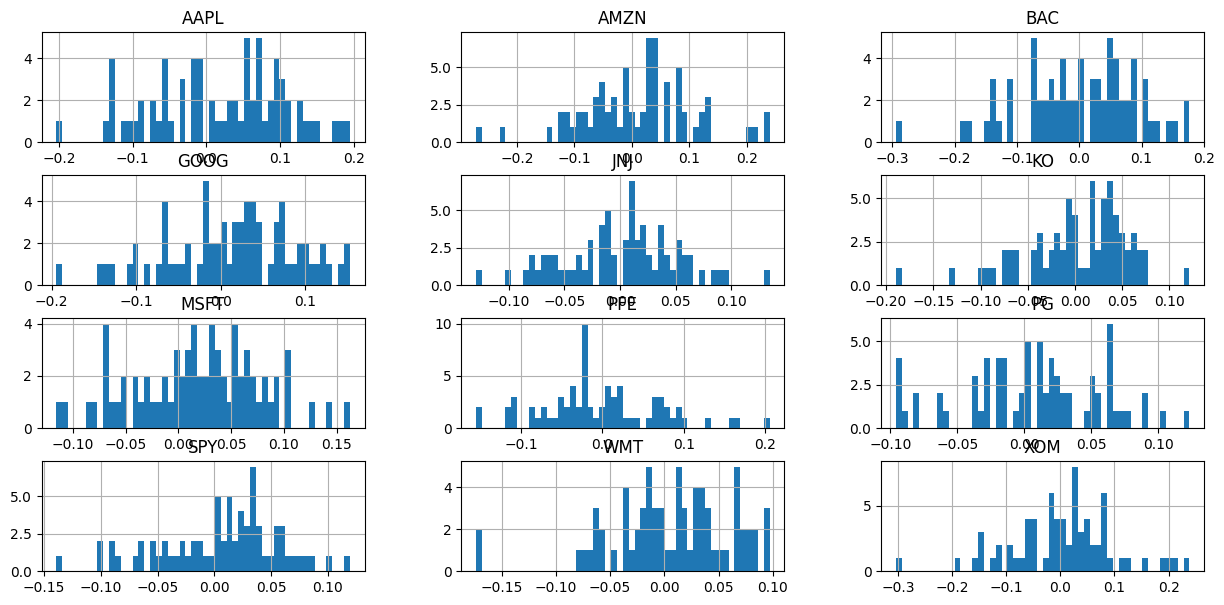

In [12]:
%matplotlib inline
fig2 = plt.figure(figsize=(15, 7))
ax2 = fig2.add_subplot(1, 1, 1)
returns_portfolio_ln.hist(bins=50, ax=ax2)
ax2.set_xlabel('Return')
ax2.set_ylabel('Frequency')
ax2.set_title('Portfolio Return Distribution')
plt.show()

Estadistica descriptiva de los retornos logaritmicos de cada activo

In [13]:
(returns_portfolio_ln*100).describe()

Ticker,AAPL,AMZN,BAC,GOOG,JNJ,KO,MSFT,PFE,PG,SPY,WMT,XOM
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1.960944,1.063230,-0.096209,1.387147,0.131821,0.247684,1.910017,-0.162662,0.701199,0.652558,0.690583,0.405524
std,8.790106,9.624280,9.189653,7.558689,5.036705,5.359422,6.000536,7.248987,5.107621,5.197099,5.478640,9.505170
min,-20.339557,-27.118568,-29.448883,-19.449498,-12.955209,-18.963938,-11.571041,-15.519868,-9.584795,-13.924736,-17.343249,-30.361965
25%,-4.908577,-5.009714,-5.942331,-3.190182,-2.950934,-2.620144,-2.258019,-4.236250,-2.390389,-2.535693,-2.372696,-5.310442
50%,2.857507,2.320341,0.290644,2.417168,0.791503,1.633892,2.229300,-1.704740,1.066106,1.500627,1.456304,0.825351
75%,8.981164,6.491970,6.104491,6.972970,3.585660,3.649259,5.755185,4.074327,4.889451,3.820839,3.957151,5.384404
max,19.423344,23.948606,17.678751,15.278993,13.471265,12.123008,16.236633,20.570844,12.346918,11.954464,9.694995,23.835203


Graficar el kernel (distribución marginal) de los rendimientos logaritmicos.

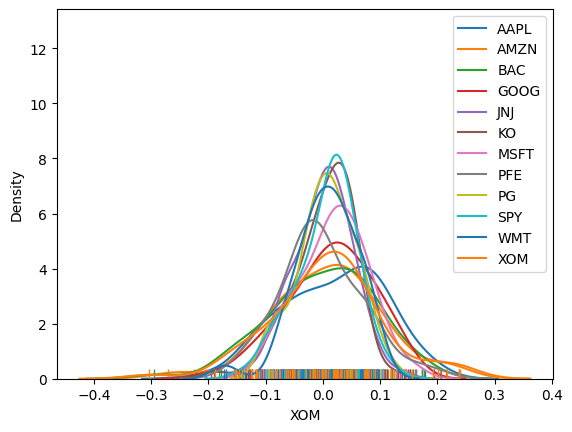

In [14]:
import seaborn as sns
plt.figure("Test Plots")
for i in returns_portfolio_ln.columns.values:
  sns.distplot(returns_portfolio_ln[i], hist=False, rug=True, label=i)
plt.legend()
plt.show()

In [15]:
closePriceTable.columns.values

array(['AAPL', 'AMZN', 'BAC', 'GOOG', 'JNJ', 'KO', 'MSFT', 'PFE', 'PG',
       'SPY', 'WMT', 'XOM'], dtype=object)

Graficar los precios NO escalonados. Para escalonar se debe dividir cada columna por su valor inicial.

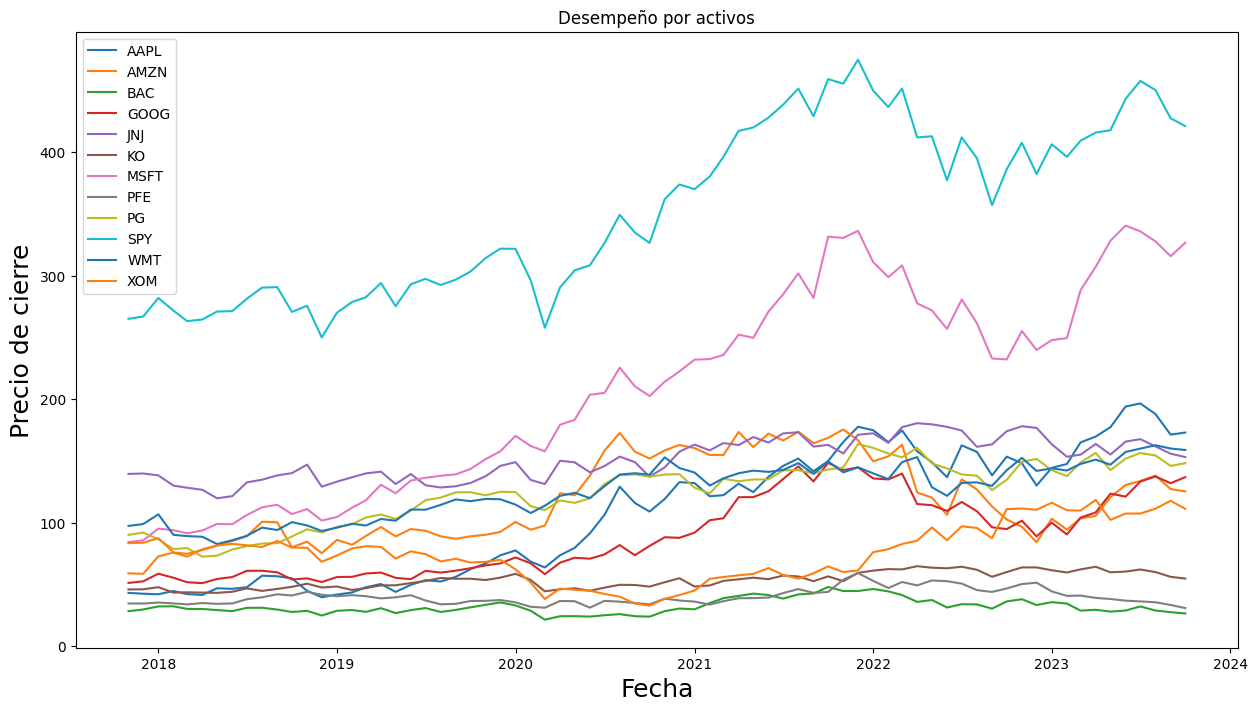

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

for i in closePriceTable.columns.values :
    ax.plot(closePriceTable[i], label = i)
ax.set_title("Desempeño por activos")
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Precio de cierre' , fontsize=18)
ax.legend(closePriceTable.columns.values , loc = 'upper left')
plt.show(fig)

## Relación de rendimiento-Riesgo por activo

Gráfica de cada activo en el plano Rendimiento (eje vertical) y riesgo (plano horizontal)

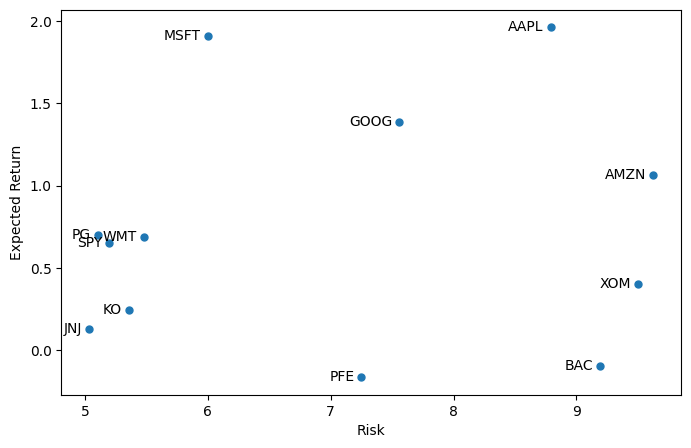

In [17]:
plt.figure(figsize=(8,5))

plt.scatter((returns_portfolio_ln*100).std(),(returns_portfolio_ln*100).mean(),s=25)

plt.xlabel('Risk')
plt.ylabel('Expected Return')


#For adding annotatios in the scatterplot
for label,x,y in zip(returns_portfolio_ln.columns,(returns_portfolio_ln*100).std(),(returns_portfolio_ln*100).mean()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom',)
    #arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

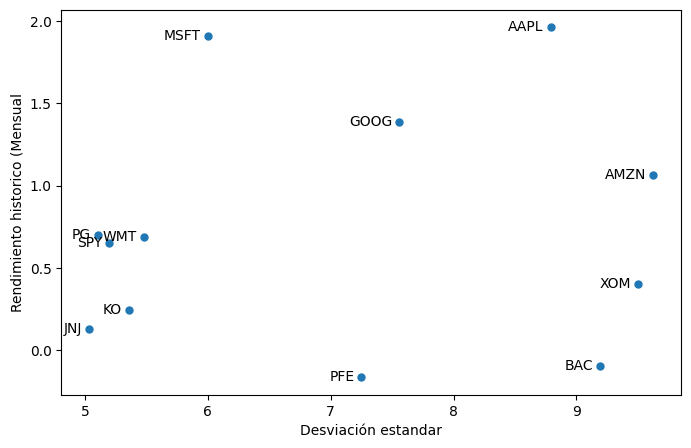

In [18]:
monthly_returns_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(1))
plt.figure(figsize=(8,5))

plt.scatter(y=(monthly_returns_ln*100).mean(),x=(monthly_returns_ln*100).std(),s=25)

plt.xlabel('Desviación estandar')
plt.ylabel('Rendimiento historico (Mensual')


#For adding annotatios in the scatterplot
for label,x,y in zip(monthly_returns_ln.columns,(monthly_returns_ln*100).std(),(monthly_returns_ln*100).mean()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom')

## Modelo indice unico

Gráfica del retorno de APPLE contra el retorno del mercado (SP500).

[Text(0.5, 0, 'Retornos Indice'), Text(0, 0.5, 'Retorno Acción')]

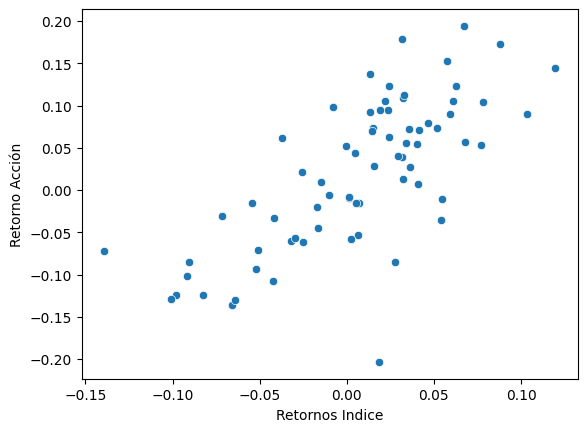

In [19]:
sns.scatterplot(y=returns_portfolio_ln['AAPL'], x=returns_portfolio_ln['SPY']).set(xlabel="Retornos Indice", ylabel="Retorno Acción")

Graficar el rendimiento de cada activo contra el indice SP500. Además hallar el Beta correspondiente de cada activo. Recordar que el Beta se halla como el coeficiente de la regresión entre el activo i y el mercado.

Beta  AAPL 1.2231184892916676


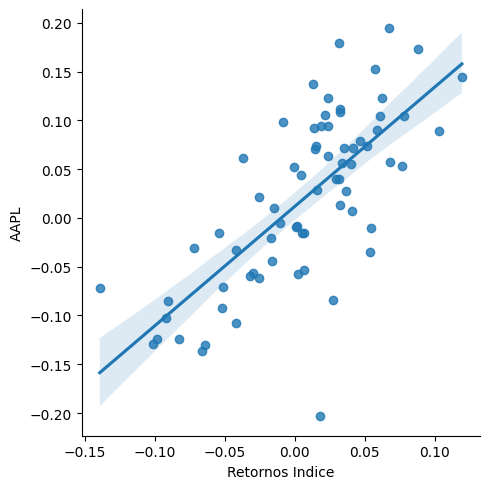

Beta  AMZN 1.2357836709597694


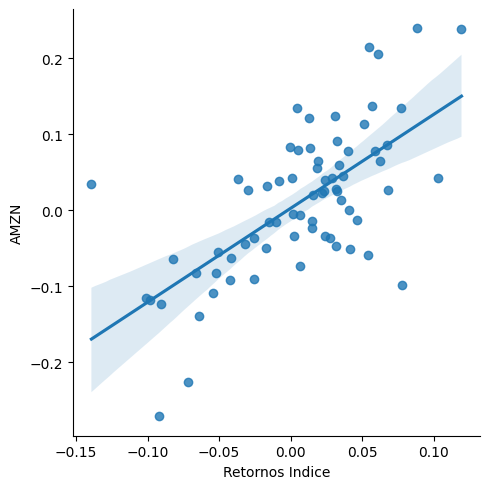

Beta  BAC 1.3878644307903139


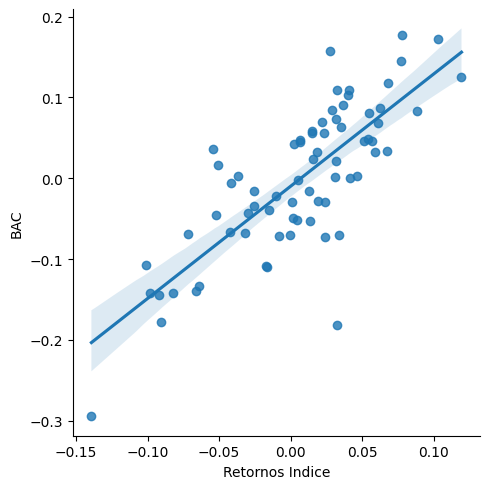

Beta  GOOG 1.1029065596133172


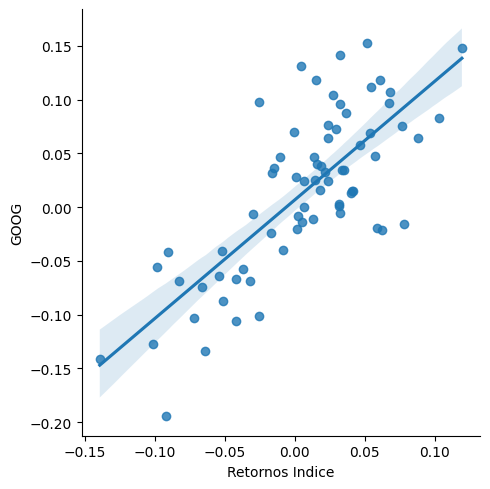

Beta  JNJ 0.5273572186170149


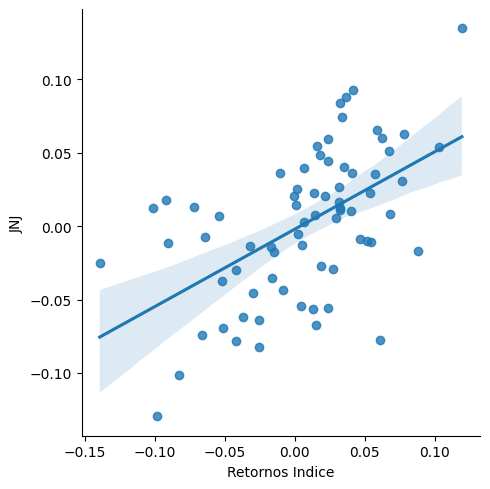

Beta  KO 0.5847729036567291


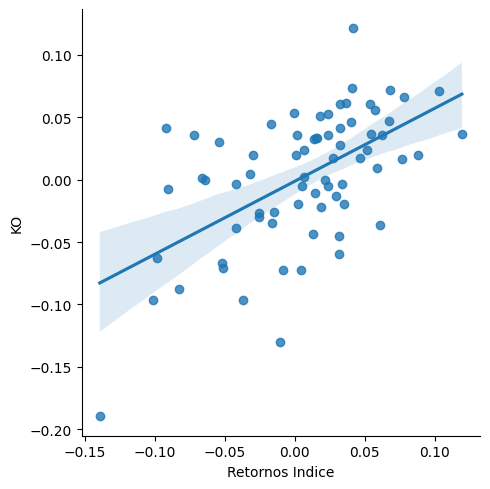

Beta  MSFT 0.901929495561538


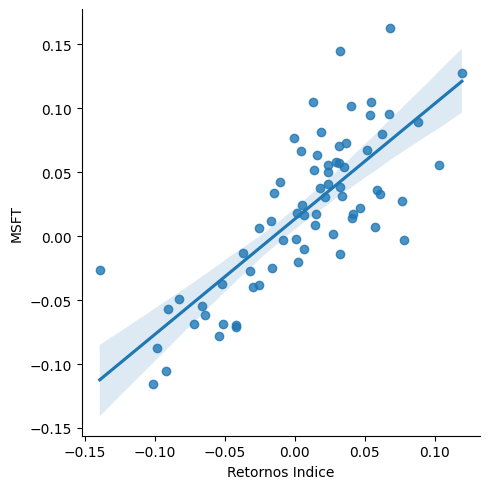

Beta  PFE 0.5809841567830065


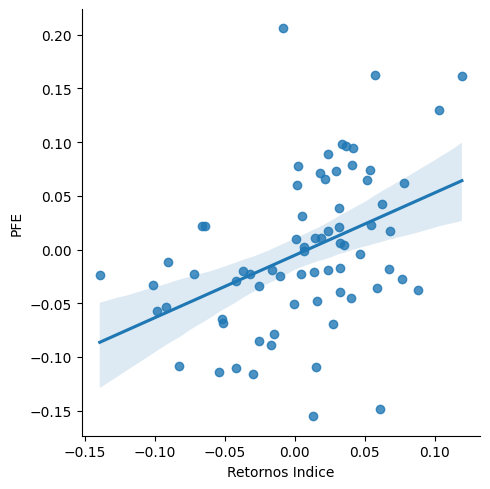

Beta  PG 0.40090124616199135


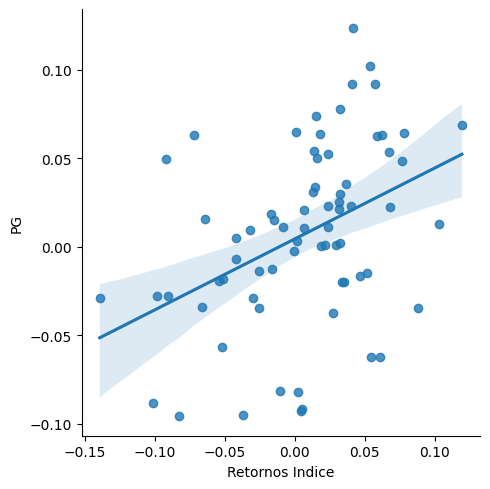

Beta  SPY 1.0


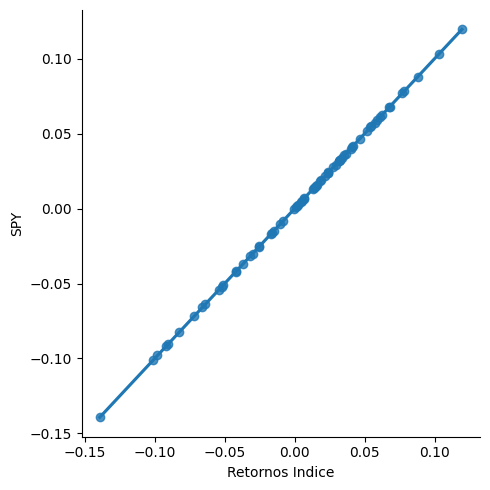

Beta  WMT 0.5161269890695105


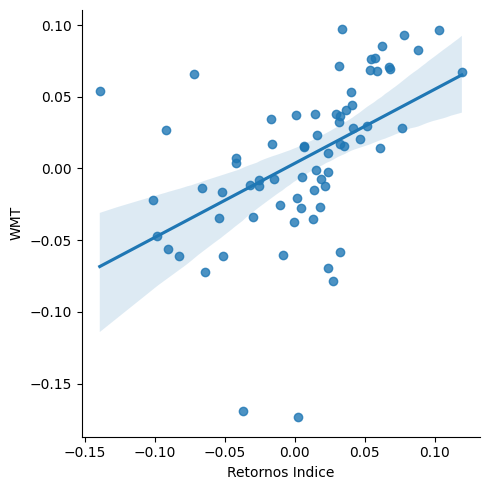

Beta  XOM 1.0541718246085388


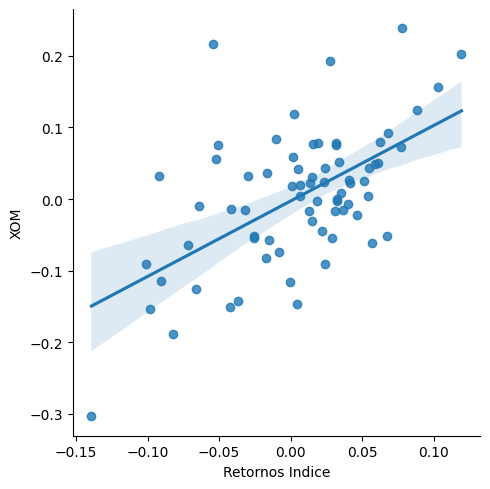

In [20]:
%matplotlib inline
from scipy import stats
#fig2 = plt.figure(figsize=(15, 7))
#ax2 = fig2.add_subplot(1, 1, 1)
for i in returns_portfolio_ln.columns:
  print("Beta ",i,stats.linregress(y=returns_portfolio_ln[i], x=returns_portfolio_ln['SPY']).slope)
  #sns.scatterplot(y=monthly_returns_ln[i], x=monthly_returns_ln['SPY']).set(xlabel="Retornos Indice", ylabel=i)
  sns.lmplot(y=i, x='SPY',data=returns_portfolio_ln).set(xlabel="Retornos Indice", ylabel=i)
  ax2.set_xlabel('Return')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Portfolio Return Distribution')
  plt.show()

In [21]:
#import requests
#headers={"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"}
#res=requests.get("https://finance.yahoo.com/quote/AAPL/financials?p=AAPL",headers=headers)
#res.status_code

200

In [22]:
!pip install yahoofinancials
from yahoofinancials import YahooFinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 905.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.16-py3-none-any.whl size=28709 sha256=d9d683b27446ad3abd96f6c70b49380982a076348c202506dd05f6e908524674
  Stored in directory: /root/.cache/pip/wheels/fd/fe/c4/4b17989f30abf08d147a72cd1097ae0f6b1a1dd070f3abf726
Successfully built yahoofinancials


In [27]:
ticker="AAPL"
yf.Ticker(ticker).info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [28]:
def InfoContable(ticketList):
    def getData(ticker):
        data=yf.Ticker(ticker).info['totalDebt']
        return data
    datas = map(getData, ticketList) #Aplicar la función GetData al array "TicketList"
    return pd.concat(datas, keys=ticketList, names=['Ticker'])

In [83]:
def GetDebt(ticker):
        data=yf.Ticker(ticker).info['totalDebt']
        return {ticker:data}

In [84]:
def getEquity(ticker):
        data=yf.Ticker(ticker).info['marketCap']
        return {ticker:data}


In [81]:
ticker="AAPL"
def beta_desapalancado(ticker):
  beta_equity=stats.linregress(y=returns_portfolio_ln[i], x=returns_portfolio_ln['SPY']).slope
  tax_rate=0.35
  debt=GetDebt(ticker)
  equity=getEquity(ticker)
  beta_un=beta_equity/(1+(1-tax_rate)*debt/equity)
  return({ticker:beta_un})

In [82]:
beta_desapalancado(ticker)

{'AAPL': 1.027195341744607}

In [88]:
getEquity(ticker)["AAPL"]


2704716595200